
# Project: European Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This European Soccer Database has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.
Our simple analytical process will include some steps for exploring and cleaning our dataset, some steps for predicting player performance,team performance using python packages. Matplotlib is used to visualize the answers of our questions.

In [5]:

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Data wrangling involves processing the data in various formats like - merging, grouping, concatenating etc. for the purpose of analysing or getting them ready to be used with another set of data. Python has built-in features to apply these wrangling methods to various data sets to achieve the analytical goal.Here we can make dataframes for every questions by merging and cleaning various datasets from the sql file.

### General Properties

In [6]:

con = sqlite3.connect(r'C:\Users\BEST\Desktop\database.sqlite')
df_team1 = pd.read_sql_query("SELECT id,season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal from Match", con)
df_team1.info()
print(df_team1.duplicated().sum())
df_team1.isnull().sum()
df_team1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
id                  25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.8+ MB
0


,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [7]:
df_team2 = pd.read_sql_query("SELECT team_api_id, team_fifa_api_id, team_long_name, team_short_name from Team", con)
df_team2.info()
print(df_team2.duplicated().sum())
df_team2.isnull().sum()
df_team2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ KB
0


,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,9987,673.0,KRC Genk,GEN
1,9993,675.0,Beerschot AC,BAC
2,10000,15005.0,SV Zulte-Waregem,ZUL
3,9994,2007.0,Sporting Lokeren,LOK
4,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
df_player1=pd.read_sql_query("SELECT player_api_id, player_name from Player", con)
df_player1.info()
print(df_player1.duplicated().sum())
df_player1.isnull().sum()
df_player1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 2 columns):
player_api_id    11060 non-null int64
player_name      11060 non-null object
dtypes: int64(1), object(1)
memory usage: 172.9+ KB
0


,player_api_id,player_name
0,505942,Aaron Appindangoye
1,155782,Aaron Cresswell
2,162549,Aaron Doran
3,30572,Aaron Galindo
4,23780,Aaron Hughes


In [9]:
df_player2=pd.read_sql_query("SELECT player_api_id,preferred_foot,free_kick_accuracy,ball_control,date from Player_Attributes", con)
df_player2.info()
print(df_player2.duplicated().sum())
df_player2.isnull().sum()
df_player2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 5 columns):
player_api_id         183978 non-null int64
preferred_foot        183142 non-null object
free_kick_accuracy    183142 non-null float64
ball_control          183142 non-null float64
date                  183978 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 7.0+ MB
1


,player_api_id,preferred_foot,free_kick_accuracy,ball_control,date
0,505942,right,39.0,49.0,2016-02-18 00:00:00
1,505942,right,39.0,49.0,2015-11-19 00:00:00
2,505942,right,39.0,49.0,2015-09-21 00:00:00
3,505942,right,38.0,48.0,2015-03-20 00:00:00
4,505942,right,38.0,48.0,2007-02-22 00:00:00




### Data Cleaning 

data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. Here two tables have null and duplicate values so we can drop these rows from the table. Here the Dataset is very large so dropping rows won't affect the properties of dataset.

In [10]:

df_team2.dropna(inplace=True)
df_team2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 297
Data columns (total 4 columns):
team_api_id         288 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      288 non-null object
team_short_name     288 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ KB


In [11]:
df_player2.drop_duplicates(inplace=True)
df_player2.dropna(inplace=True)
df_player2.info()
df_player2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 5 columns):
player_api_id         183142 non-null int64
preferred_foot        183142 non-null object
free_kick_accuracy    183142 non-null float64
ball_control          183142 non-null float64
date                  183142 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 8.4+ MB


,player_api_id,preferred_foot,free_kick_accuracy,ball_control,date
0,505942,right,39.0,49.0,2016-02-18 00:00:00
1,505942,right,39.0,49.0,2015-11-19 00:00:00
2,505942,right,39.0,49.0,2015-09-21 00:00:00
3,505942,right,38.0,48.0,2015-03-20 00:00:00
4,505942,right,38.0,48.0,2007-02-22 00:00:00


<a id='eda'></a>
## Data Analysis

In this section we are going to do the analysis phase . we have to merge different tables and select some variables for particular questions according to the needs. Here we need to answer two questions . Firstly, find which team scored most goals over the time period . For this question we merged two tables into one and sort the table using Goals scored in Descending order and also created a pie chart using matplotlib for the top ten teams. Second question is to find the relation between ball control and free kick accuracy and also we have to find most preffered foot of players related with free kick accuracy.

### Q1.find which team scored most goals over the period.

In [12]:

df_team1['team_api_id'] = ''
def set_win(df_team1):
    if  (df_team1['home_team_goal'] > df_team1['away_team_goal']):
        return df_team1.home_team_api_id
    elif  (df_team1['home_team_goal'] < df_team1['away_team_goal']):
        return df_team1.away_team_api_id
    else : return "draw"
df_team1['team_api_id'] = df_team1.apply(set_win, axis = 1)
df_team1.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,draw
1,2,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,draw
2,3,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635
3,4,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991
4,5,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985


In [13]:
df_win=df_team1[df_team1.team_api_id!='draw']
df_win.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id
2,3,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635
3,4,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991
4,5,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985
7,8,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2,9996
8,9,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,0,10001


In [14]:
#pd.merge(df_win, df_team2, on='team_api_id', how='full')
df_win2=pd.merge(df_win, df_team2, left_on='team_api_id', right_on='team_api_id')
df_win2.info()
df_win2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19304 entries, 0 to 19303
Data columns (total 13 columns):
id                  19304 non-null int64
season              19304 non-null object
stage               19304 non-null int64
date                19304 non-null object
match_api_id        19304 non-null int64
home_team_api_id    19304 non-null int64
away_team_api_id    19304 non-null int64
home_team_goal      19304 non-null int64
away_team_goal      19304 non-null int64
team_api_id         19304 non-null object
team_fifa_api_id    19304 non-null float64
team_long_name      19304 non-null object
team_short_name     19304 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 2.1+ MB


,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,3,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,229.0,RSC Anderlecht,AND
1,18,2008/2009,10,2008-11-02 00:00:00,492572,9993,8635,1,3,8635,229.0,RSC Anderlecht,AND
2,37,2008/2009,13,2008-11-22 00:00:00,492591,8635,10001,2,0,8635,229.0,RSC Anderlecht,AND
3,50,2008/2009,14,2008-11-28 00:00:00,492664,7947,8635,0,2,8635,229.0,RSC Anderlecht,AND
4,55,2008/2009,15,2008-12-06 00:00:00,492683,8635,4049,5,1,8635,229.0,RSC Anderlecht,AND


In [15]:
df4=df_win2['team_long_name'].value_counts()
df_win2['Win_Count'] = df_win2.groupby(['team_long_name'])['team_api_id'].transform('count')
df_win2.head()
df_win3= df_win2[['team_long_name', 'Win_Count']].copy()
df_win3.drop_duplicates(inplace=True)
df_win3.sort_values('Win_Count',ascending=False)

,team_long_name,Win_Count
17101,FC Barcelona,234
16873,Real Madrid CF,228
14915,Celtic,218
6615,FC Bayern Munich,193
2073,Manchester United,192
8700,Juventus,189
13870,SL Benfica,185
13044,FC Porto,183
10686,Ajax,181
18352,FC Basel,180


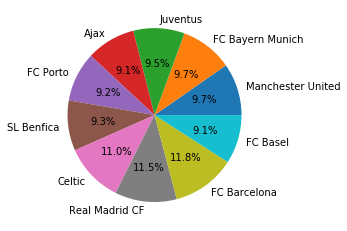

In [16]:
df_win4 = df_win3[(df_win3['Win_Count'] >= 180)]
labels = df_win4["team_long_name"]
# Extract the sizes of the segments
sizes = df_win4["Win_Count"]
# Plot with labels and percentage
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()

### find how related ball control and free kick accuracy and also find most preffered foot of players related to free kick accuracy.

In [17]:
df_player=pd.merge(df_player1, df_player2, left_on='player_api_id', right_on='player_api_id')
df_player.info()
df_player.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183141
Data columns (total 6 columns):
player_api_id         183142 non-null int64
player_name           183142 non-null object
preferred_foot        183142 non-null object
free_kick_accuracy    183142 non-null float64
ball_control          183142 non-null float64
date                  183142 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ MB


,player_api_id,player_name,preferred_foot,free_kick_accuracy,ball_control,date
0,505942,Aaron Appindangoye,right,39.0,49.0,2016-02-18 00:00:00
1,505942,Aaron Appindangoye,right,39.0,49.0,2015-11-19 00:00:00
2,505942,Aaron Appindangoye,right,39.0,49.0,2015-09-21 00:00:00
3,505942,Aaron Appindangoye,right,38.0,48.0,2015-03-20 00:00:00
4,505942,Aaron Appindangoye,right,38.0,48.0,2007-02-22 00:00:00


In [18]:
df_player2['free_kick_accuracy'].corr(df_player2['ball_control'])

0.7197427523430298

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


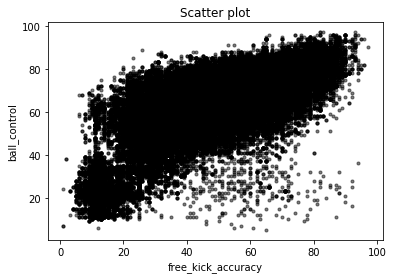

In [30]:
colors = (0,0,0)
area = np.pi*3
plt.scatter(df_player2.free_kick_accuracy, df_player2.ball_control, c=colors, s=area, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('free_kick_accuracy')
plt.ylabel('ball_control')
plt.show()

In [77]:
df_player.free_kick_accuracy= df_player.free_kick_accuracy.astype(int)
df_player.ball_control= df_player.ball_control.astype(int)
df_player5=df_player.sort_values('free_kick_accuracy',ascending=False)
df_player5.head()

,player_api_id,player_name,preferred_foot,free_kick_accuracy,ball_control,date
91760,30684,"Juninho Pernambucano,20",right,97,90,2007-08-30 00:00:00
6199,30727,Alessandro Del Piero,right,96,94,2009-02-22 00:00:00
38761,30612,David Beckham,right,96,82,2008-08-30 00:00:00
38760,30612,David Beckham,right,96,82,2009-02-22 00:00:00
68032,304733,Hakan Calhanoglu,right,95,80,2015-09-21 00:00:00


In [78]:
df_player5['year'] = pd.DatetimeIndex(df_player5['date']).year
df_player5.head()
df_player5=df_player5.drop(['date'],axis=1)

In [79]:
df_player5.drop_duplicates(inplace=True)
df_player5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106827 entries, 91760 to 179541
Data columns (total 6 columns):
player_api_id         106827 non-null int64
player_name           106827 non-null object
preferred_foot        106827 non-null object
free_kick_accuracy    106827 non-null int32
ball_control          106827 non-null int32
year                  106827 non-null int64
dtypes: int32(2), int64(2), object(2)
memory usage: 4.9+ MB


In [81]:
right=df_player5.preferred_foot == 'right'
left=df_player5.preferred_foot == 'left'

In [84]:
df_player5.free_kick_accuracy[right].mean()

47.823909611823055

In [85]:
df_player5.free_kick_accuracy[left].mean()

52.95578979297793

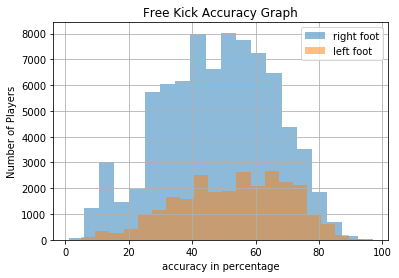

In [91]:
df_player5.free_kick_accuracy[right].hist(alpha=0.5,bins=20,label='right foot')
df_player5.free_kick_accuracy[left].hist(alpha=0.5,bins=20,label='left foot')
plt.title('Free Kick Accuracy Graph')
plt.xlabel('accuracy in percentage')
plt.ylabel('Number of Players')
plt.legend();

<a id='conclusions'></a>
## Conclusions
Here we analyzed a large dataset of european soccer and answered two questions. we used packages like pandas, numpy and matpoltlib for visualizing the data.For the first question we found that barcelona won more games over the time period and drawn a pie chart for the top ten teams.secondly we found positive correlation of free kick accuracy and ball control of players and clearly plotted using a scatter plot. In the second part of this question we created a graph that displays, in every instance of free kick accuracy percentage the number of players who prefer right foot is very much higher than players who prefer left foot.

### Limitations

There are some limitations to consider regarding this analysis. First of all, this Database has details of more than 25,000 matches and more than 10,000 players . Since it has some null values and duplicate values in the dataset. Also the dataset contains so many irrelevant data and misses relevant data like number of goals and number of wins etc.Most time consuming phase in this analysis is Data wrangling because data is spread across several tables. we have to merge data from different tables for particular uses.